In [1]:
# Import Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn theme for consistent styling
# Setting a plain white background
sns.set_theme(style="white")

# Import Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Import Libraries for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Libraries for Model Tuning and Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from scipy.stats import randint, uniform
import joblib

# Import Model Interpretability Libraries
import shap
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# Ensure plots display in notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
vehicleinsurance_data = pd.read_csv("C:\\Users\\dell\\Desktop\\Vehicleinsurance_data.csv")

In [5]:
#display the first few rows
vehicleinsurance_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [7]:
# Display dataset information
print(vehicleinsurance_data.info())  
print(vehicleinsurance_data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
# check for basic statistics
vehicleinsurance_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [11]:
# Identify numerical features dynamically
numerical_features = vehicleinsurance_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)


Numerical Features: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']


In [13]:
# Identify categorical features dynamically
categorical_features = vehicleinsurance_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [15]:
# Check for missing values
missing_values = vehicleinsurance_data.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)

Missing Values in Dataset:
 Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [17]:
# Check for duplicate rows
print(f"Duplicate rows: {vehicleinsurance_data.duplicated().sum()}")

Duplicate rows: 0


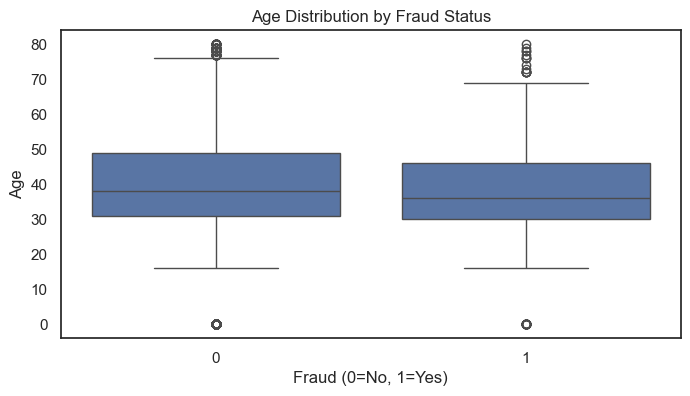

In [19]:
# Show age distribution in fraudulent vs non-fraudulent claims
plt.figure(figsize=(8, 4))
sns.boxplot(x='FraudFound_P', y='Age', data=vehicleinsurance_data)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

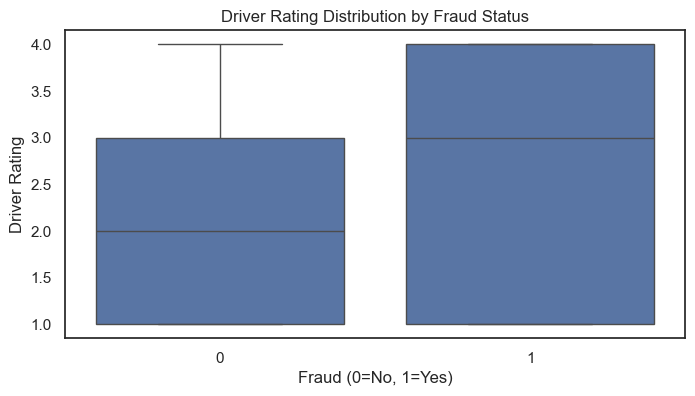

In [21]:
# Display relationship between driver ratings and fraud
plt.figure(figsize=(8, 4))
sns.boxplot(x='FraudFound_P', y='DriverRating', data=vehicleinsurance_data)
plt.title('Driver Rating Distribution by Fraud Status')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Driver Rating')
plt.show()

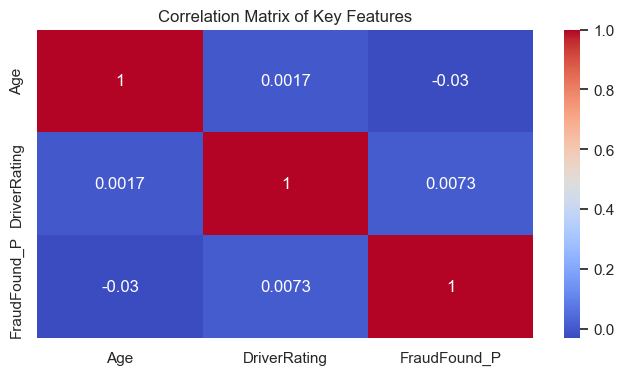

In [23]:
# Display key correlations between important features
plt.figure(figsize=(8, 4))
important_features = ['Age', 'DriverRating', 'FraudFound_P']
correlation_matrix = vehicleinsurance_data[important_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()

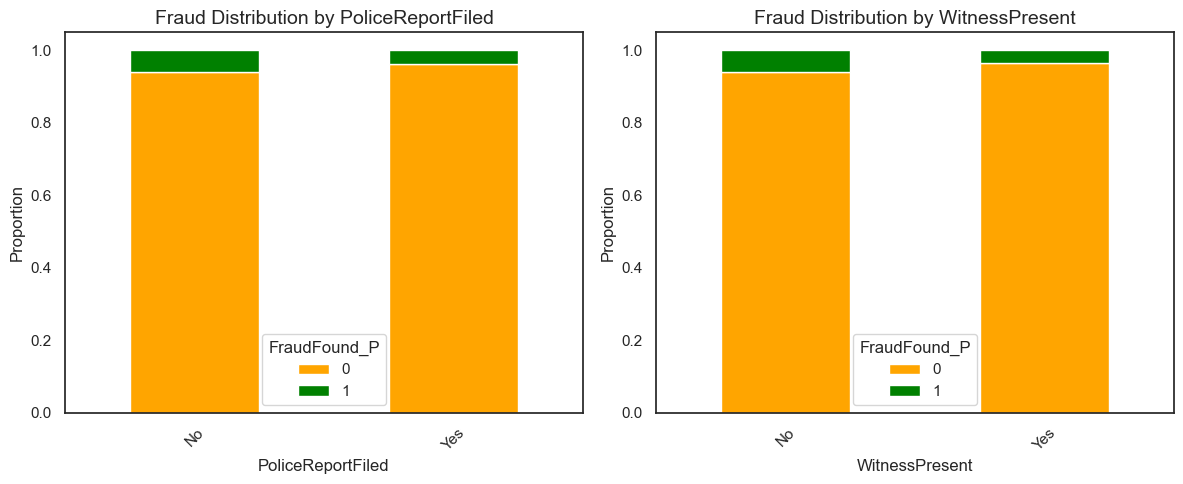

In [25]:
# Create side-by-side stacked bar plots showing fraud distribution by police reports and witnesses
plt.figure(figsize=(12, 5))
for i, col in enumerate(['PoliceReportFiled', 'WitnessPresent']):
    plt.subplot(1, 2, i + 1)
    
    # Group and normalize the data
    df_plot = vehicleinsurance_data.groupby(col)['FraudFound_P'].value_counts(normalize=True).unstack()
    
    # Plot the stacked bar chart
    df_plot.plot(kind='bar', stacked=True, ax=plt.gca(), color=['orange', 'green'])
    
    # Add titles and labels
    plt.title(f'Fraud Distribution by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


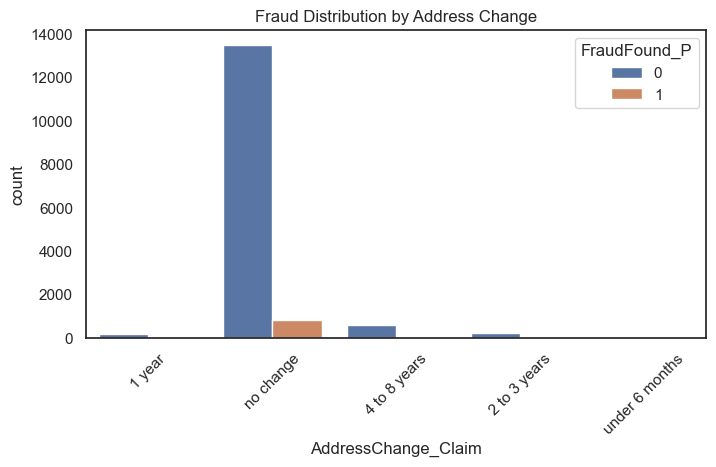

In [27]:
# Create visualization for claim timing patterns
plt.figure(figsize=(8, 4))
sns.countplot(data=vehicleinsurance_data, x='AddressChange_Claim', hue='FraudFound_P')
plt.title('Fraud Distribution by Address Change')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x500 with 0 Axes>

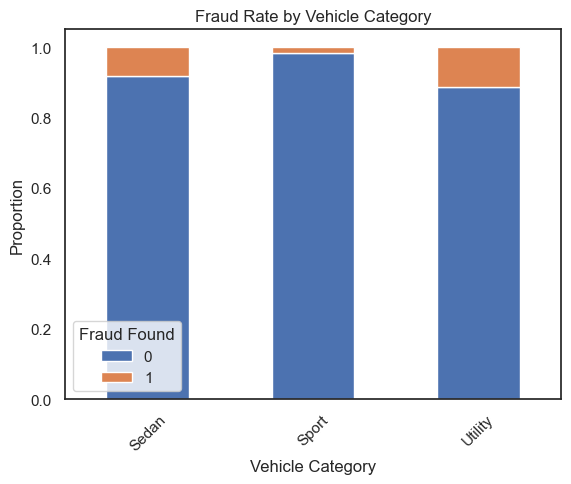

In [28]:
# Visualize Vehicle-related fraud patterns
df_veh = pd.crosstab(vehicleinsurance_data['VehicleCategory'], vehicleinsurance_data['FraudFound_P'], normalize='index')

# Plotting the bar chart
plt.figure(figsize=(12, 5))
df_veh.plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Fraud Found')
plt.show()

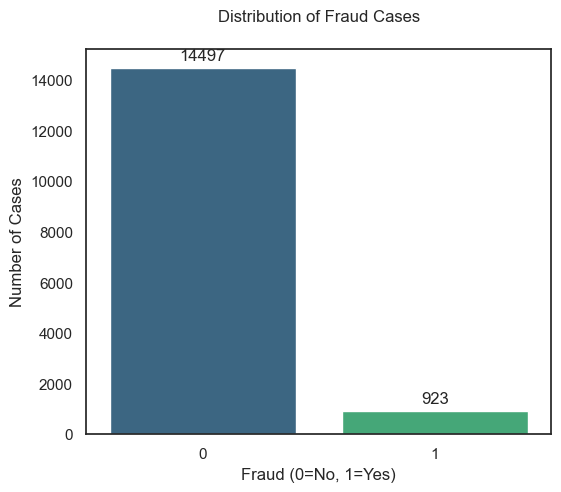

In [30]:
# Create bar plot showing fraud vs non-fraud case distribution with count labels
plt.figure(figsize=(6, 5))
fraud_counts = vehicleinsurance_data['FraudFound_P'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, palette='viridis', dodge=False)
plt.title('Distribution of Fraud Cases', pad=20)
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Number of Cases')
plt.legend([], [], frameon=False)  # Suppress legend if unnecessary

# Adding count labels on bars
for i, v in enumerate(fraud_counts.values):
    plt.text(i, v + 0.02 * max(fraud_counts.values), str(v), ha='center')

plt.show()

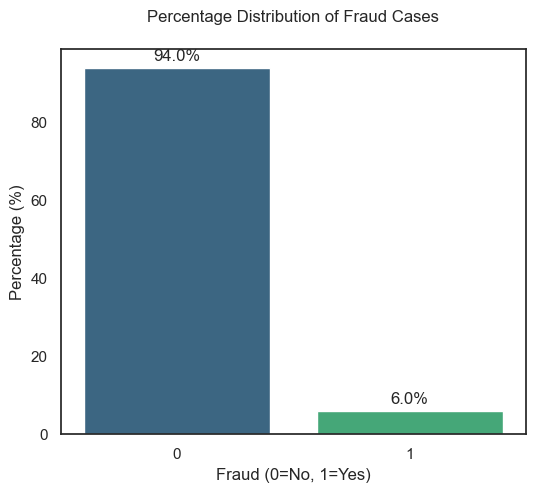

In [33]:
# Plot fraud percentage distribution

plt.figure(figsize=(6, 5))
fraud_percentages = vehicleinsurance_data['FraudFound_P'].value_counts(normalize=True) * 100
sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values, hue=fraud_percentages.index, palette='viridis', dodge=False)
plt.title('Percentage Distribution of Fraud Cases', pad=20)
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Percentage (%)')
plt.legend([], [], frameon=False)  # Suppress legend if unnecessary

# Adding percentage labels on bars
for i, v in enumerate(fraud_percentages.values):
    plt.text(i, v + 0.02 * max(fraud_percentages.values), f'{v:.1f}%', ha='center')

plt.show()


In [35]:
# Print summary statistics
print("\nFraud Distribution Summary:")
print("-" * 25)
print("\nCounts:")
print(fraud_counts)
print("\nPercentages:")
print(fraud_percentages)

# Calculate and print imbalance ratio
imbalance_ratio = fraud_counts[0] / fraud_counts[1]
print(f"\nClass Imbalance Ratio (Non-fraud:Fraud): {imbalance_ratio:.2f}:1")


Fraud Distribution Summary:
-------------------------

Counts:
FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Percentages:
FraudFound_P
0    94.014267
1     5.985733
Name: proportion, dtype: float64

Class Imbalance Ratio (Non-fraud:Fraud): 15.71:1


In [37]:
# Detect categorical columns
categorical_columns = vehicleinsurance_data.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}

# Apply Label Encoding to all categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    vehicleinsurance_data[col] = le.fit_transform(vehicleinsurance_data[col])
    label_encoders[col] = le  # Store the encoder for each column
print("Categorical encoding completed.")

Categorical encoding completed.


In [39]:
# verify encoded columns
# Check data types
# Preview transformed data
print(vehicleinsurance_data.info())  
print(vehicleinsurance_data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int32
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int32
 3   Make                  15420 non-null  int32
 4   AccidentArea          15420 non-null  int32
 5   DayOfWeekClaimed      15420 non-null  int32
 6   MonthClaimed          15420 non-null  int32
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int32
 9   MaritalStatus         15420 non-null  int32
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int32
 12  PolicyType            15420 non-null  int32
 13  VehicleCategory       15420 non-null  int32
 14  VehiclePrice          15420 non-null  int32
 15  FraudFound_P          15420 non-null  int64
 16  Poli

In [41]:
# check for basic statistics after encoding
vehicleinsurance_data.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,5.532101,2.788586,2.915759,10.114591,0.896368,4.202789,6.595720,2.693969,0.843061,1.303372,...,4.799287,4.891894,0.027756,0.005642,0.015629,2.003372,2.888521,0.098833,1994.866472,1.036316
std,3.409595,1.287585,2.055485,5.282919,0.304792,2.273944,3.410951,1.259115,0.363755,0.475131,...,1.140206,1.395907,0.164279,0.074904,0.124039,1.110645,0.451081,0.383472,0.803313,0.782355
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,1.000000,5.000000,7.000000,3.000000,1.000000,1.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000
75%,8.000000,4.000000,5.000000,13.000000,1.000000,6.000000,10.000000,4.000000,1.000000,2.000000,...,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000
max,11.000000,5.000000,6.000000,18.000000,1.000000,7.000000,12.000000,5.000000,1.000000,3.000000,...,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000


In [43]:
# Detect numerical columns
numerical_columns = vehicleinsurance_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable
if 'FraudFound_P' in numerical_columns:
    numerical_columns.remove('FraudFound_P')
    
print("Numerical columns:", numerical_columns)


Numerical columns: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']


In [45]:
# Apply scaling
scaler = StandardScaler()
vehicleinsurance_data[numerical_columns] = scaler.fit_transform(vehicleinsurance_data[numerical_columns])

print("Numerical columns scaled successfully!")

Numerical columns scaled successfully!


In [47]:
# Verify the dataset after scaling
print(vehicleinsurance_data.info())
print(vehicleinsurance_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int32  
 1   WeekOfMonth           15420 non-null  float64
 2   DayOfWeek             15420 non-null  int32  
 3   Make                  15420 non-null  int32  
 4   AccidentArea          15420 non-null  int32  
 5   DayOfWeekClaimed      15420 non-null  int32  
 6   MonthClaimed          15420 non-null  int32  
 7   WeekOfMonthClaimed    15420 non-null  float64
 8   Sex                   15420 non-null  int32  
 9   MaritalStatus         15420 non-null  int32  
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  int32  
 12  PolicyType            15420 non-null  int32  
 13  VehicleCategory       15420 non-null  int32  
 14  VehiclePrice          15420 non-null  int32  
 15  FraudFound_P       

In [49]:
# Verify using mean and std checks after standardization
print(vehicleinsurance_data[numerical_columns].mean())  # Should be close to 0
print(vehicleinsurance_data[numerical_columns].std())   # Should be close to 1


WeekOfMonth           1.267181e-16
WeekOfMonthClaimed   -2.036705e-16
Age                  -1.087471e-16
PolicyNumber         -5.898150e-17
RepNumber            -1.105903e-17
Deductible           -3.919044e-16
DriverRating         -1.059824e-17
Year                  7.561428e-14
dtype: float64
WeekOfMonth           1.000032
WeekOfMonthClaimed    1.000032
Age                   1.000032
PolicyNumber          1.000032
RepNumber             1.000032
Deductible            1.000032
DriverRating          1.000032
Year                  1.000032
dtype: float64


In [51]:
# Split features/target and check fraud class imbalance
    
# Step 1: Separate features and target variable
X = vehicleinsurance_data.drop('FraudFound_P', axis=1)  # Features
y = vehicleinsurance_data['FraudFound_P']              # Target variable
    
# Step 2: Print class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts(normalize=True))

Class distribution before SMOTE:
FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64


In [53]:
# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
    
# Step 4: Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Class distribution after SMOTE:
FraudFound_P
0    0.5
1    0.5
Name: proportion, dtype: float64


In [55]:
# Check dataset shapes before and after SMOTE balancing (features and target)
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)
print("Resampled X shape:", X_resampled.shape)
print("Resampled y shape:", y_resampled.shape)


Original X shape: (15420, 32)
Original y shape: (15420,)
Resampled X shape: (28994, 32)
Resampled y shape: (28994,)


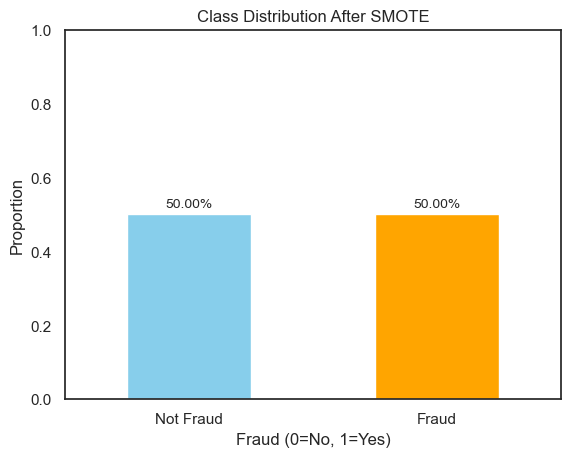

In [57]:
# Visualize fraud vs non-fraud distribution after SMOTE with percentages
# Calculate the class distribution
class_counts_resampled = pd.Series(y_resampled).value_counts(normalize=True)

# Plot the class distribution
class_counts_resampled.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution After SMOTE")
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)
plt.ylim(0, 1)

# Annotate the percentages on the bars
for i, v in enumerate(class_counts_resampled):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=10)

plt.show()

In [59]:
# splitting the dataset (dividing the dataset into training, validation, and testing datasets)
    
# First split: Training + Validation vs Test (80-20)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
    
# Second split: Training vs Validation (75-25 of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)


In [61]:
# Verify shapes of train, validation, and test splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17396, 32)
X_val shape: (5799, 32)
X_test shape: (5799, 32)
y_train shape: (17396,)
y_val shape: (5799,)
y_test shape: (5799,)


In [63]:
# Check class distributions in all dataset splits

print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_val:")
print(y_val.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


Class distribution in y_train:
FraudFound_P
0    0.5
1    0.5
Name: proportion, dtype: float64

Class distribution in y_val:
FraudFound_P
1    0.500086
0    0.499914
Name: proportion, dtype: float64

Class distribution in y_test:
FraudFound_P
0    0.500086
1    0.499914
Name: proportion, dtype: float64


In [65]:
# Verify total sample count after splitting matches dataset before splitting

total_samples = len(X_train) + len(X_val) + len(X_test)
print("Total samples after splitting:", total_samples)
print("Dataset size before splitting:", X_resampled.shape[0])

Total samples after splitting: 28994
Dataset size before splitting: 28994


In [67]:
# Initializing the model
rf = RandomForestClassifier(random_state=42)

# Defining parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Performing Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fitting the model
grid_search_rf.fit(X_train, y_train)

# Printing results
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

# Storing best model
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9607076824516231


In [69]:
# Initializing XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Defining parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, 2, 5]  # Helpful for imbalanced datasets
}

# Performing Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fitting the model
grid_search_xgb.fit(X_train, y_train)

# Printing results
print("Best parameters:", grid_search_xgb.best_params_)
print("Best cross-validation score:", grid_search_xgb.best_score_)

# Storing best model
best_xgb = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.9}
Best cross-validation score: 0.9738512475780615


In [71]:
# Initializing LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, 2, 5]  # Helpful for imbalanced datasets
}

# Performing Grid Search
grid_search_lgb = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid_lgb,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fitting the model
grid_search_lgb.fit(X_train, y_train)

# Printing results
print("Best parameters:", grid_search_lgb.best_params_)
print("Best cross-validation score:", grid_search_lgb.best_score_)

# Storing best model
best_lgb = grid_search_lgb.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[LightGBM] [Info] Number of positive: 8698, number of negative: 8698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2180
[LightGBM] [Info] Number of data points in the train set: 17396, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 63, 'scale_pos_weight': 2, 'subsample': 0.8}
Best cross-validation score: 0.9739885952526934


In [73]:
# Initializing Neural Network model
nn_model = MLPClassifier(random_state=42)

# Defining parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500],
    'early_stopping': [True],
    'validation_fraction': [0.2]
}

# Performing Grid Search
grid_search_nn = GridSearchCV(
    estimator=nn_model,
    param_grid=param_grid_nn,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fitting the model
grid_search_nn.fit(X_train, y_train)

# Printing results
print("Best parameters:", grid_search_nn.best_params_)
print("Best cross-validation score:", grid_search_nn.best_score_)

# Storing best model
best_nn = grid_search_nn.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001, 'max_iter': 500, 'validation_fraction': 0.2}
Best cross-validation score: 0.9179117973272793


In [75]:
# Initializing Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Defining parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Performing Grid Search
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fitting the model
grid_search_dt.fit(X_train, y_train)

# Printing results
print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

# Storing best model
best_dt = grid_search_dt.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9180081197993528


In [67]:
# Load and verify trained models from saved files
try:
    best_rf = joblib.load('best_rf_model.joblib')
    best_xgb = joblib.load('best_xgb_model.joblib')
    best_lgb = joblib.load('best_lgb_model.joblib')
    best_nn = joblib.load('best_nn_model.joblib')
    best_dt = joblib.load('best_dt_model.joblib')
    print("All models loaded successfully!")
    
    # Verify models loaded correctly
    print("\nChecking loaded models:")
    print("Random Forest loaded:", best_rf is not None)
    print("XGBoost loaded:", best_xgb is not None)
    print("LightGBM loaded:", best_lgb is not None)
    print("Neural Network loaded:", best_nn is not None)
    print("Decision Tree loaded:", best_dt is not None)
    
except Exception as e:
    print(f"Error loading models: {str(e)}")

All models loaded successfully!

Checking loaded models:
Random Forest loaded: True
XGBoost loaded: True
LightGBM loaded: True
Neural Network loaded: True
Decision Tree loaded: True


In [69]:
# Saving all trained models 
print("\nSaving trained models...")
try:
    # 1. Saving Random Forest
    joblib.dump(best_rf, 'best_rf_model.joblib')
    print("Random Forest model saved successfully!")
    
    # 2. Saving XGBoost
    joblib.dump(best_xgb, 'best_xgb_model.joblib')
    print("XGBoost model saved successfully!")
    
    # 3. Saving LightGBM
    joblib.dump(best_lgb, 'best_lgb_model.joblib')
    print("LightGBM model saved successfully!")
    
    # 4. Saving Neural Network
    joblib.dump(best_nn, 'best_nn_model.joblib')
    print("Neural Network model saved successfully!")
    
    # 5. Saving Decision Tree
    joblib.dump(best_dt, 'best_dt_model.joblib')
    print("Decision Tree model saved successfully!")
    
    print("\nAll models saved successfully!")

except Exception as e:
    print(f"Error saving models: {str(e)}")


Saving trained models...
Random Forest model saved successfully!
XGBoost model saved successfully!
LightGBM model saved successfully!
Neural Network model saved successfully!
Decision Tree model saved successfully!

All models saved successfully!


In [71]:
# Evaluate the performance of each model

def evaluate_model(model, X_val, y_val):
    """
    Evaluating the performance of a model using common classification metrics.
    """
    # Predicting on validation set
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    # Print metrics
    print("Validation Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()


Evaluating Random Forest Model:
Validation Set Performance:
Accuracy: 0.9646
Precision: 0.9674
Recall: 0.9617
F1 Score: 0.9646
ROC-AUC: 0.9937

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2899
           1       0.97      0.96      0.96      2900

    accuracy                           0.96      5799
   macro avg       0.96      0.96      0.96      5799
weighted avg       0.96      0.96      0.96      5799



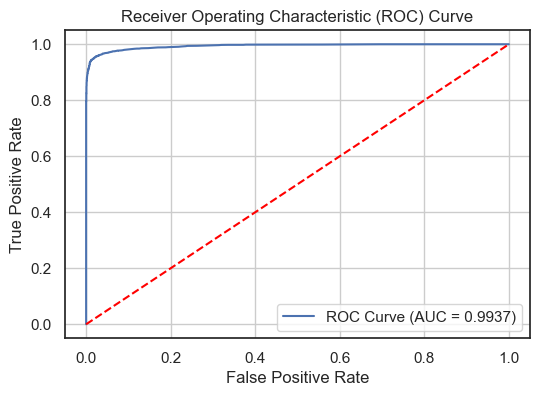

In [73]:
# Evaluate Random Forest Model
print("Evaluating Random Forest Model:")
evaluate_model(best_rf, X_val, y_val)

Evaluating XGBoost Model:
Validation Set Performance:
Accuracy: 0.9757
Precision: 0.9792
Recall: 0.9721
F1 Score: 0.9756
ROC-AUC: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2899
           1       0.98      0.97      0.98      2900

    accuracy                           0.98      5799
   macro avg       0.98      0.98      0.98      5799
weighted avg       0.98      0.98      0.98      5799



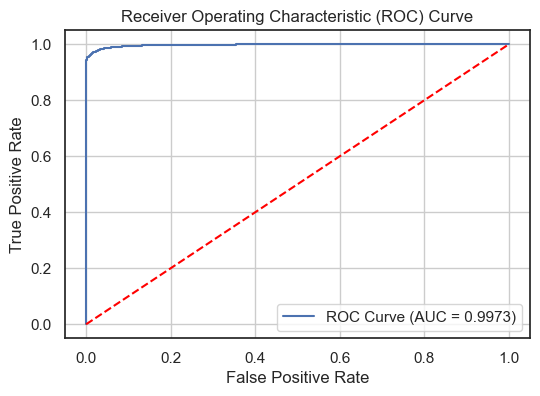

In [75]:
# Evaluate XGBoost Model
print("Evaluating XGBoost Model:")
evaluate_model(best_xgb, X_val, y_val)


Evaluating LightGBM Model:
Validation Set Performance:
Accuracy: 0.9753
Precision: 0.9943
Recall: 0.9562
F1 Score: 0.9749
ROC-AUC: 0.9971

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2899
           1       0.99      0.96      0.97      2900

    accuracy                           0.98      5799
   macro avg       0.98      0.98      0.98      5799
weighted avg       0.98      0.98      0.98      5799



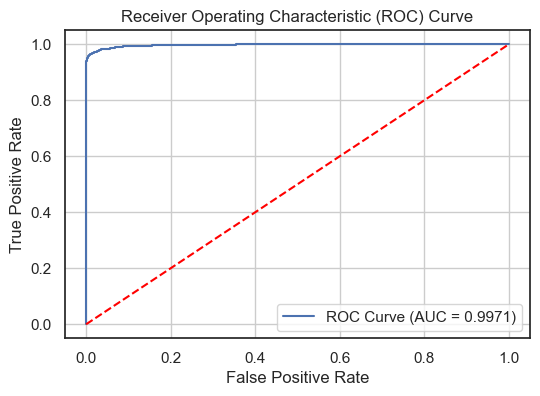

In [77]:
# Evaluate LightGBM Model
print("Evaluating LightGBM Model:")
evaluate_model(best_lgb, X_val, y_val)

Evaluating Neural Network Model:
Validation Set Performance:
Accuracy: 0.9291
Precision: 0.9005
Recall: 0.9648
F1 Score: 0.9316
ROC-AUC: 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2899
           1       0.90      0.96      0.93      2900

    accuracy                           0.93      5799
   macro avg       0.93      0.93      0.93      5799
weighted avg       0.93      0.93      0.93      5799



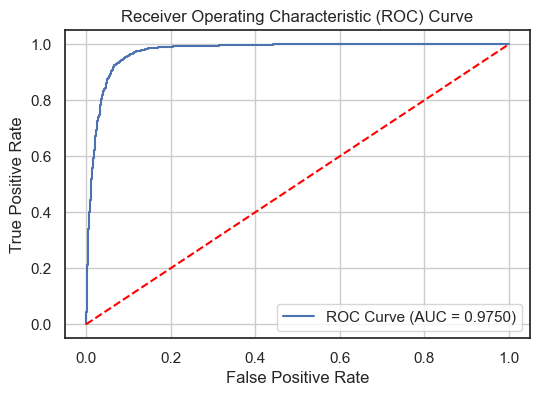

In [79]:
# Evaluate Neural Network Model
print("Evaluating Neural Network Model:")
evaluate_model(best_nn, X_val, y_val)


Evaluating Decision Tree Model:
Validation Set Performance:
Accuracy: 0.9212
Precision: 0.9043
Recall: 0.9421
F1 Score: 0.9228
ROC-AUC: 0.9180

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2899
           1       0.90      0.94      0.92      2900

    accuracy                           0.92      5799
   macro avg       0.92      0.92      0.92      5799
weighted avg       0.92      0.92      0.92      5799



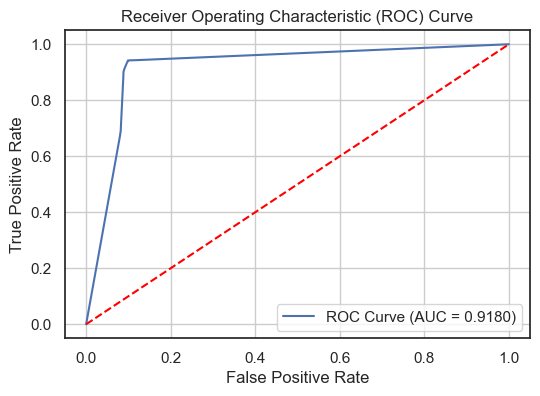

In [81]:
# Evaluate Decision Tree Model
print("Evaluating Decision Tree Model:")
evaluate_model(best_dt, X_val, y_val)



Model Performance Comparison:
                Accuracy  Precision  Recall  F1 Score  ROC-AUC
Random Forest     0.9646     0.9674  0.9617    0.9646   0.9937
XGBoost           0.9757     0.9792  0.9721    0.9756   0.9973
LightGBM          0.9753     0.9943  0.9562    0.9749   0.9971
Neural Network    0.9291     0.9005  0.9648    0.9316   0.9750
Decision Tree     0.9212     0.9043  0.9421    0.9228   0.9180

Mean Performance of Each Model:
------------------------------
Random Forest: 0.9704
XGBoost: 0.9800
LightGBM: 0.9796
Neural Network: 0.9402
Decision Tree: 0.9217

Best Performing Model: XGBoost


<Figure size 1200x600 with 0 Axes>

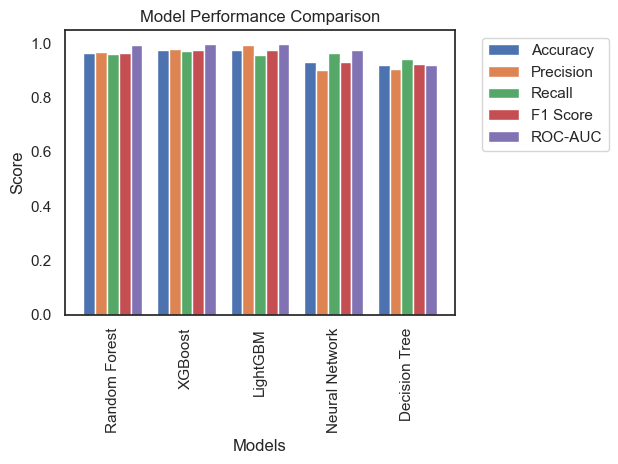

In [83]:
# Compare and select the best performing model based on their performance metrics

def evaluate_model(model, X_val, y_val, verbose=False):
    """
    Evaluate model and return metrics dictionary
    """
    # Geting the predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba)
    }
    
    return metrics

# Quietly collecting metrics
model_metrics = {
    'Random Forest': evaluate_model(best_rf, X_val, y_val),
    'XGBoost': evaluate_model(best_xgb, X_val, y_val),
    'LightGBM': evaluate_model(best_lgb, X_val, y_val),
    'Neural Network': evaluate_model(best_nn, X_val, y_val),
    'Decision Tree': evaluate_model(best_dt, X_val, y_val)
}

# Create DataFrame and comparing
metrics_df = pd.DataFrame(model_metrics).T

# Calculate mean performance for each model
mean_performance = metrics_df.mean(axis=1)

# Find the best performing model
best_model = mean_performance.idxmax()

# Print comparison
print("\nModel Performance Comparison:")
print("=" * 50)
print(metrics_df.round(4))

print("\nMean Performance of Each Model:")
print("-" * 30)
for model, score in mean_performance.items():
    print(f"{model}: {score:.4f}")

print(f"\nBest Performing Model: {best_model}")

# Visualize comparison
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [85]:
# Check sample of X_test indices before prediction
print("Sample of indices in X_test:")
print(X_test.index[:10])

Sample of indices in X_test:
Index([28765, 9220, 12887, 1806, 16728, 17613, 8479, 24618, 27938, 12521], dtype='int64')


In [87]:
# Analyze specific test dataset instances using the XGBoost model for predictions

def analyze_test_instances(model, X_test, y_test, indices=[9220, 16728, 24618]):
    print("\nPredictions Using XGBoost Model (Best Model)")
    print("=" * 50)
    
        #Extract a single instance from X_test
        # Using double brackets to keep the structure as a DataFrame
    for idx in indices:
        instance = X_test.loc[[idx]]  # Double brackets to keep DataFrame structure
        
        # Make a prediction for each instance
        prediction = model.predict(instance)[0]
        probability = model.predict_proba(instance)[0]
        actual = y_test.loc[idx]

        # Print detailed analysis for each instance
        print(f"\nAnalyzing Instance {idx}:")
        print("-" * 25)
        print(f"Prediction Results:")
        print(f"Predicted: {'Fraud' if prediction == 1 else 'Non-Fraud'}")
        print(f"Probability of Fraud: {probability[1]:.4f}")
        print(f"Actual Class: {'Fraud' if actual == 1 else 'Non-Fraud'}")
        print("-" * 50)

# Specify the indices of test instances to be analysed
# Call the function with the best model and test data
indices_to_analyze = [9220, 16728, 24618]
analyze_test_instances(best_xgb, X_test, y_test, indices_to_analyze)



Predictions Using XGBoost Model (Best Model)

Analyzing Instance 9220:
-------------------------
Prediction Results:
Predicted: Non-Fraud
Probability of Fraud: 0.0001
Actual Class: Non-Fraud
--------------------------------------------------

Analyzing Instance 16728:
-------------------------
Prediction Results:
Predicted: Fraud
Probability of Fraud: 1.0000
Actual Class: Fraud
--------------------------------------------------

Analyzing Instance 24618:
-------------------------
Prediction Results:
Predicted: Fraud
Probability of Fraud: 1.0000
Actual Class: Fraud
--------------------------------------------------


In [89]:
# Calculate and compare test and validation metrics for model (XGBoost) performance comparison

def calculate_test_metrics(model, X_test, y_test, X_val, y_val):
    """
    Calculate and compare test and validation metrics using XGBoost model
    """
    print("\nModel Performance Comparison (XGBoost)")
    print("=" * 50)
    
    # Get test predictions
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Calculate test metrics
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_test)
    }
    
    # Get validation predictions
    y_pred_val = model.predict(X_val)
    y_pred_proba_val = model.predict_proba(X_val)[:, 1]
    
    # Calculate validation metrics
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_pred_val),
        'precision': precision_score(y_val, y_pred_val),
        'recall': recall_score(y_val, y_pred_val),
        'f1': f1_score(y_val, y_pred_val),
        'roc_auc': roc_auc_score(y_val, y_pred_proba_val)
    }
    
    # Print test metrics
    print("\nTest Set Performance:")
    for metric, value in test_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")
    
    # Print validation metrics
    print("\nValidation Set Performance:")
    for metric, value in val_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")
        
    # Compare differences
    print("\nDifference (Test - Validation):")
    for metric in test_metrics.keys():
        diff = test_metrics[metric] - val_metrics[metric]
        print(f"{metric.capitalize()}: {diff:.4f}")

# Calculate and compare metrics
calculate_test_metrics(best_xgb, X_test, y_test, X_val, y_val)


Model Performance Comparison (XGBoost)

Test Set Performance:
Accuracy: 0.9771
Precision: 0.9809
Recall: 0.9731
F1: 0.9770
Roc_auc: 0.9970

Validation Set Performance:
Accuracy: 0.9757
Precision: 0.9792
Recall: 0.9721
F1: 0.9756
Roc_auc: 0.9973

Difference (Test - Validation):
Accuracy: 0.0014
Precision: 0.0017
Recall: 0.0010
F1: 0.0014
Roc_auc: -0.0003



SHAP Analysis for XGBoost Predictions
Creating SHAP explainer...
Calculating SHAP values...

Global Feature Importance Analysis:


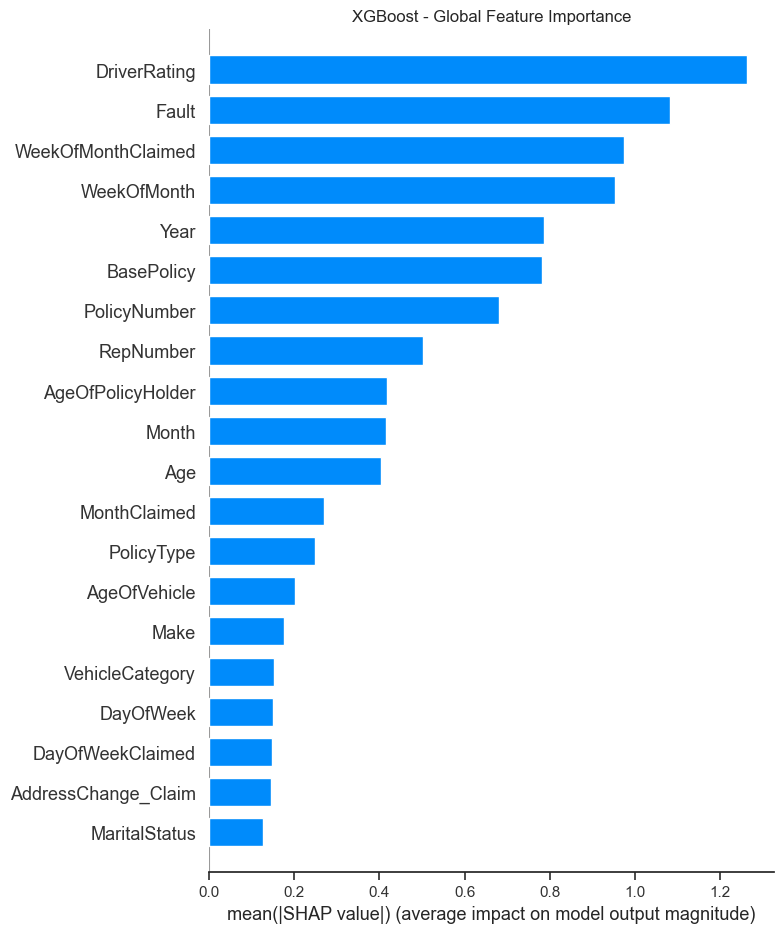


Top 10 Most Important Features:
               Feature  Importance
18        DriverRating    1.263745
11               Fault    1.083385
7   WeekOfMonthClaimed    0.974213
1          WeekOfMonth    0.952775
30                Year    0.787116
31          BasePolicy    0.782571
15        PolicyNumber    0.681953
16           RepNumber    0.503098
23   AgeOfPolicyHolder    0.418200
0                Month    0.416406

Individual Prediction Analysis
------------------------------

Analyzing Instance 9220
------------------------------
Predicted: Non-Fraud
Probability of Fraud: 0.0001


<Figure size 2000x300 with 0 Axes>

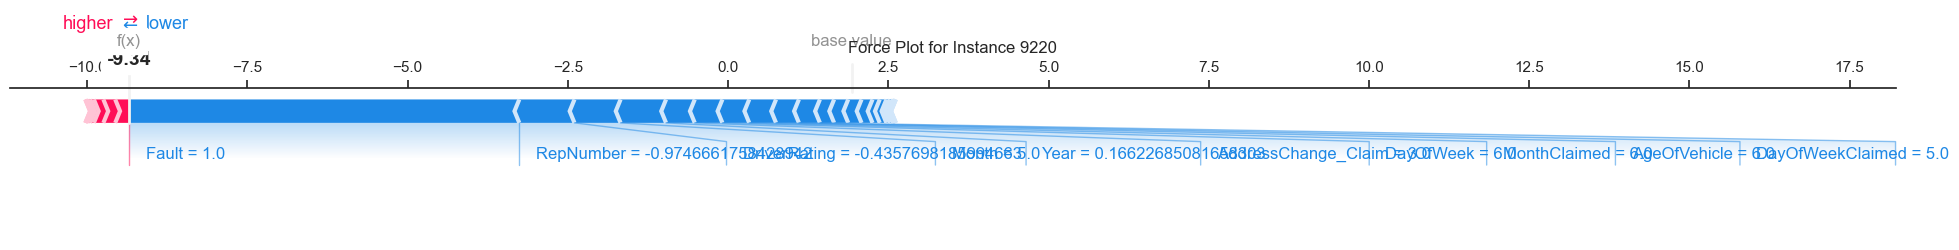


Top 5 Contributing Features for this Instance:
- Fault: value = 1.0000, impact = -6.0853 (decreasing fraud probability)
- RepNumber: value = -0.9747, impact = -0.8610 (decreasing fraud probability)
- DriverRating: value = -0.4358, impact = -0.7193 (decreasing fraud probability)
- Month: value = 5.0000, impact = -0.7097 (decreasing fraud probability)
- Year: value = 0.1662, impact = -0.4478 (decreasing fraud probability)
--------------------------------------------------

Analyzing Instance 16728
------------------------------
Predicted: Fraud
Probability of Fraud: 1.0000


<Figure size 2000x300 with 0 Axes>

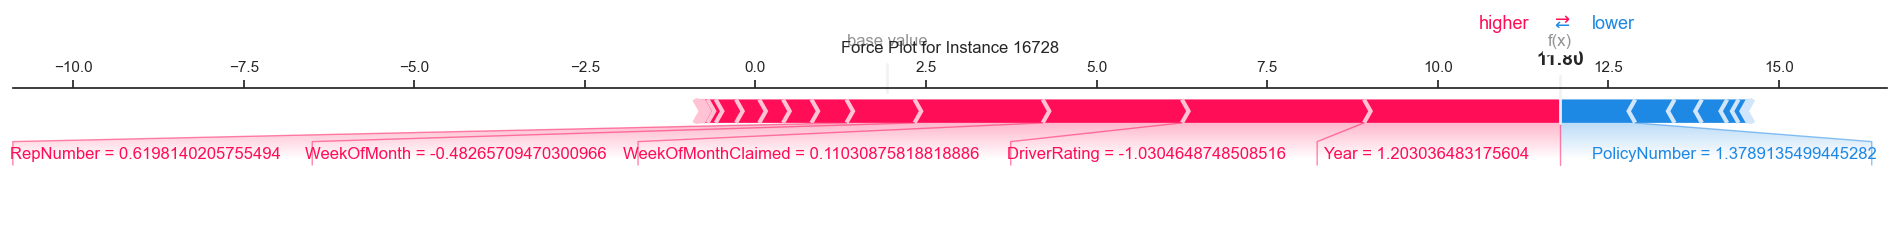


Top 5 Contributing Features for this Instance:
- Year: value = 1.2030, impact = 2.8788 (increasing fraud probability)
- DriverRating: value = -1.0305, impact = 2.6684 (increasing fraud probability)
- WeekOfMonthClaimed: value = 0.1103, impact = 2.0410 (increasing fraud probability)
- WeekOfMonth: value = -0.4827, impact = 1.8780 (increasing fraud probability)
- PolicyNumber: value = 1.3789, impact = -1.0971 (decreasing fraud probability)
--------------------------------------------------

Analyzing Instance 24618
------------------------------
Predicted: Fraud
Probability of Fraud: 1.0000


<Figure size 2000x300 with 0 Axes>

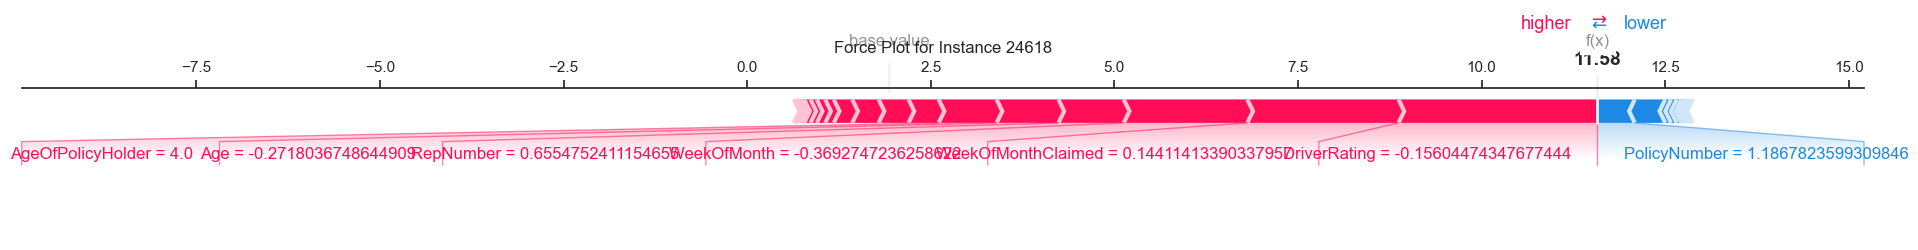


Top 5 Contributing Features for this Instance:
- DriverRating: value = -0.1560, impact = 2.7089 (increasing fraud probability)
- WeekOfMonthClaimed: value = 0.1441, impact = 2.0590 (increasing fraud probability)
- WeekOfMonth: value = -0.3693, impact = 1.6824 (increasing fraud probability)
- RepNumber: value = 0.6555, impact = 0.8891 (increasing fraud probability)
- Age: value = -0.2718, impact = 0.8425 (increasing fraud probability)
--------------------------------------------------


In [91]:
# SHAP implementation for interpreting XGBoost predictions and understanding feature contributions

def implement_shap_for_predictions(model, X_test, indices=[9220, 16728, 24618]):
    """
    Implement SHAP analysis for XGBoost predictions on specific test instances
    """
    print("\nSHAP Analysis for XGBoost Predictions")
    print("=" * 50)
    
    try:
        # Create SHAP explainer
        print("Creating SHAP explainer...")
        explainer = shap.TreeExplainer(model)
        
        # Calculate SHAP values for all test data
        print("Calculating SHAP values...")
        shap_values = explainer.shap_values(X_test)
        
        # Plot Global Feature Importance Plot
        print("\nGlobal Feature Importance Analysis:")
        plt.figure(figsize=(10, 6))
        if isinstance(shap_values, list):
            shap.summary_plot(
                shap_values[1], 
                X_test,
                plot_type="bar",
                show=False
            )
        else:
            shap.summary_plot(
                shap_values, 
                X_test,
                plot_type="bar",
                show=False
            )
        plt.title("XGBoost - Global Feature Importance")
        plt.tight_layout()
        plt.show()
        
        # List Global Feature Importance Values
        if isinstance(shap_values, list):
            importance_values = np.abs(shap_values[1]).mean(0)
        else:
            importance_values = np.abs(shap_values).mean(0)
            
        feature_importance = pd.DataFrame({
            'Feature': X_test.columns,
            'Importance': importance_values
        })
        feature_importance = feature_importance.sort_values('Importance', ascending=False)
        
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10).to_string())
        
        # Carry out Individual Prediction Analysis
        print("\nIndividual Prediction Analysis")
        print("-" * 30)
        
        for idx in indices:
            instance = X_test.loc[[idx]]
            prediction = model.predict(instance)[0]
            probability = model.predict_proba(instance)[0]
            
            print(f"\nAnalyzing Instance {idx}")
            print("-" * 30)
            print(f"Predicted: {'Fraud' if prediction == 1 else 'Non-Fraud'}")
            print(f"Probability of Fraud: {probability[1]:.4f}")
            
            # Force plot for this instance
            plt.figure(figsize=(20, 3))
            instance_index = X_test.index.get_loc(idx)
            if isinstance(shap_values, list):
                shap.force_plot(
                    explainer.expected_value[1] if isinstance(explainer.expected_value, list) 
                    else explainer.expected_value,
                    shap_values[1][instance_index],
                    instance,
                    matplotlib=True,
                    show=False
                )
            else:
                shap.force_plot(
                    explainer.expected_value,
                    shap_values[instance_index],
                    instance,
                    matplotlib=True,
                    show=False
                )
            plt.title(f"Force Plot for Instance {idx}")
            plt.tight_layout()
            plt.show()
            
            # Show feature contributions with values and impact direction
            if isinstance(shap_values, list):
                instance_shap = shap_values[1][instance_index]
            else:
                instance_shap = shap_values[instance_index]
            
            feature_contributions = pd.DataFrame({
                'Feature': instance.columns,
                'Value': instance.values[0],
                'SHAP Impact': instance_shap
            })
            feature_contributions['Absolute Impact'] = abs(feature_contributions['SHAP Impact'])
            feature_contributions = feature_contributions.sort_values('Absolute Impact', ascending=False)
            
            print("\nTop 5 Contributing Features for this Instance:")
            for _, row in feature_contributions.head().iterrows():
                impact = "increasing" if row['SHAP Impact'] > 0 else "decreasing"
                print(f"- {row['Feature']}: value = {row['Value']:.4f}, "
                      f"impact = {row['SHAP Impact']:.4f} ({impact} fraud probability)")
            print("-" * 50)
            
    except Exception as e:
        print(f"Error in SHAP analysis: {str(e)}")
        import traceback
        traceback.print_exc()

# Analyze specific predictions
indices_to_analyze = [9220, 16728, 24618]
implement_shap_for_predictions(best_xgb, X_test, indices_to_analyze)


LIME Local Explanations for Specific Instances

Local Explanation for Instance 9220
Prediction: Non-Fraud
Probability of Fraud: 0.0001

Prediction Probabilities:
Class           Probability     Percentage
---------------------------------------------
Non-Fraud       0.9999      99.99%
Fraud           0.0001      0.01%


<Figure size 1000x600 with 0 Axes>

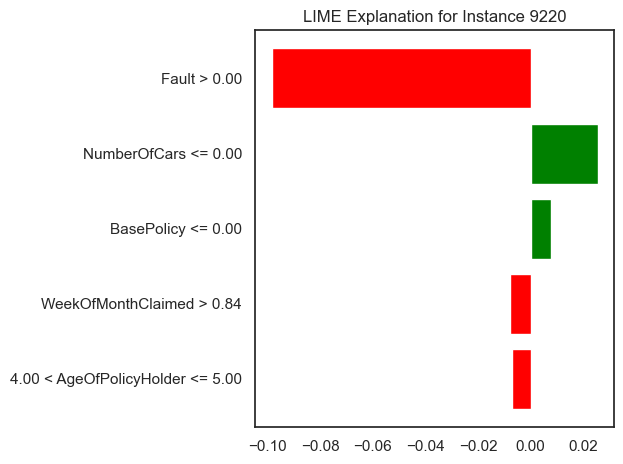


Feature Contributions:

For Non-Fraud (Class 0):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault > 0.00                   0.0985       → Fraud        
NumberOfCars <= 0.00           0.0255       → Non-Fraud    
BasePolicy <= 0.00             0.0079       → Non-Fraud    
WeekOfMonthClaimed > 0.84      0.0077       → Fraud        
4.00 < AgeOfPolicyHolder <= 5.00 0.0071       → Fraud        

For Fraud (Class 1):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault > 0.00                   0.0985       → Non-Fraud    
NumberOfCars <= 0.00           0.0255       → Fraud        
BasePolicy <= 0.00             0.0079       → Fraud        
WeekOfMonthClaimed > 0.84      0.0077       → Non-Fraud    
4.00 < AgeOfPolicyHolder <= 5.00 0.0071       → Non-Fraud    

Local Explanation for Instance 16728
Prediction: Fraud
Probability of F

<Figure size 1000x600 with 0 Axes>

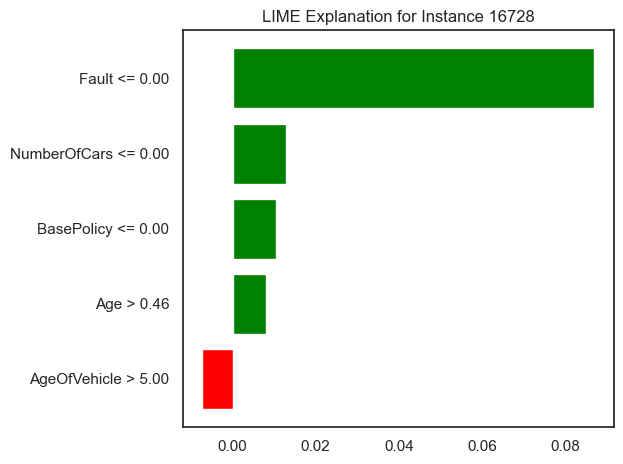


Feature Contributions:

For Non-Fraud (Class 0):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault <= 0.00                  0.0871       → Non-Fraud    
NumberOfCars <= 0.00           0.0128       → Non-Fraud    
BasePolicy <= 0.00             0.0104       → Non-Fraud    
Age > 0.46                     0.0080       → Non-Fraud    
AgeOfVehicle > 5.00            0.0073       → Fraud        

For Fraud (Class 1):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault <= 0.00                  0.0871       → Fraud        
NumberOfCars <= 0.00           0.0128       → Fraud        
BasePolicy <= 0.00             0.0104       → Fraud        
Age > 0.46                     0.0080       → Fraud        
AgeOfVehicle > 5.00            0.0073       → Non-Fraud    

Local Explanation for Instance 24618
Prediction: Fraud
Probability of Fraud

<Figure size 1000x600 with 0 Axes>

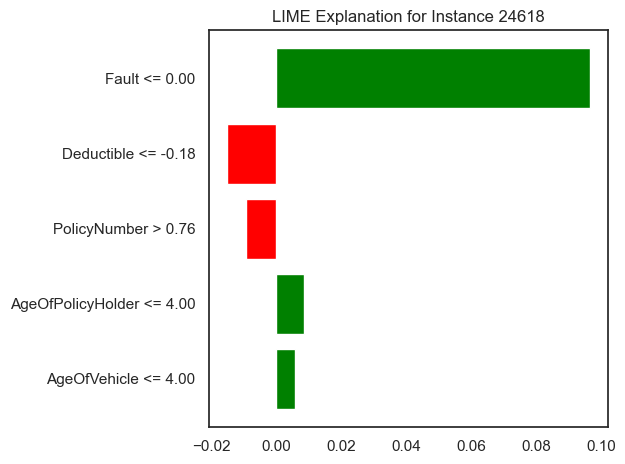


Feature Contributions:

For Non-Fraud (Class 0):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault <= 0.00                  0.0966       → Non-Fraud    
Deductible <= -0.18            0.0151       → Fraud        
PolicyNumber > 0.76            0.0093       → Fraud        
AgeOfPolicyHolder <= 4.00      0.0087       → Non-Fraud    
AgeOfVehicle <= 4.00           0.0059       → Non-Fraud    

For Fraud (Class 1):
Feature                        Impact       Direction      
-----------------------------------------------------------------
Fault <= 0.00                  0.0966       → Fraud        
Deductible <= -0.18            0.0151       → Non-Fraud    
PolicyNumber > 0.76            0.0093       → Non-Fraud    
AgeOfPolicyHolder <= 4.00      0.0087       → Fraud        
AgeOfVehicle <= 4.00           0.0059       → Fraud        


In [92]:
# LIME implementation for interpreting XGBoost predictions and understanding feature contributions

def implement_lime_predictions(model, X_test, indices=[9220, 16728, 24618]):
    """
    Implement LIME analysis for XGBoost predictions on test instances
    """
    print("\nLIME Local Explanations for Specific Instances")
    print("=" * 50)
    
    # Create LIME explainer with fixed random state
    explainer = lime_tabular.LimeTabularExplainer(
        X_test.values,
        feature_names=X_test.columns.tolist(),
        class_names=['Non-Fraud', 'Fraud'],
        mode='classification',
        random_state=42  # Fixed random state
    )

    for idx in indices:
        print(f"\nLocal Explanation for Instance {idx}")
        print("=" * 40)
        
        instance = X_test.loc[idx].values
        pred_proba = model.predict_proba(instance.reshape(1, -1))[0]
        prediction = 'Fraud' if pred_proba[1] > 0.5 else 'Non-Fraud'
        
        # Print prediction details in tabular format
        print(f"Prediction: {prediction}")
        print(f"Probability of Fraud: {pred_proba[1]:.4f}")
        print("\nPrediction Probabilities:")
        print(f"{'Class':<15} {'Probability':<15} {'Percentage'}")
        print("-" * 45)
        print(f"{'Non-Fraud':<15} {pred_proba[0]:.4f}{' '*5} {pred_proba[0]:.2%}")
        print(f"{'Fraud':<15} {pred_proba[1]:.4f}{' '*5} {pred_proba[1]:.2%}")
        
        # Generate explanation
        exp = explainer.explain_instance(
             instance,
            model.predict_proba,
            num_features=5,
            labels=[0, 1]
        )
        
        # Plot explanation
        plt.figure(figsize=(10, 6))
        exp.as_pyplot_figure()
        plt.title(f"LIME Explanation for Instance {idx}")
        plt.tight_layout()
        plt.show()
        
        # Print feature contributions in tabular format
        print("\nFeature Contributions:")
        print("\nFor Non-Fraud (Class 0):")
        print(f"{'Feature':<30} {'Impact':<12} {'Direction':<15}")
        print("-" * 65)
        for feature, weight in exp.as_list(label=0):
            direction = "→ Non-Fraud" if weight < 0 else "→ Fraud"
            print(f"{feature:<30} {abs(weight):<12.4f} {direction:<15}")
            
        print("\nFor Fraud (Class 1):")
        print(f"{'Feature':<30} {'Impact':<12} {'Direction':<15}")
        print("-" * 65)
        for feature, weight in exp.as_list(label=1):
            direction = "→ Fraud" if weight > 0 else "→ Non-Fraud"
            print(f"{feature:<30} {abs(weight):<12.4f} {direction:<15}")
        print("=" * 65)

# Generate local explanations for specific instances
indices_to_analyze = [9220, 16728, 24618]
implement_lime_predictions(best_xgb, X_test, indices_to_analyze)
    


Comparing SHAP and LIME Interpretability


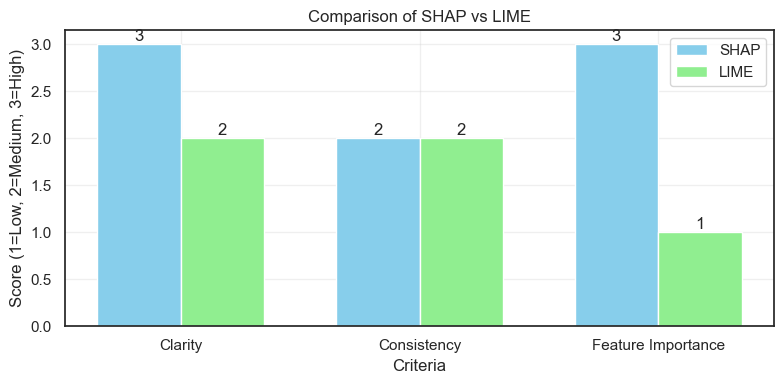


SHAP Assessment:
------------------------------
Clarity: High - Very clear SHAP explanations
Consistency: Medium - Moderate consistency in feature importance
Feature Importance: High - Many significant features with strong importance values. Top features: DriverRating, Fault, WeekOfMonthClaimed, WeekOfMonth, Year

LIME Assessment:
------------------------------
Clarity: Medium - Moderately clear LIME explanations
Consistency: Medium - Moderate consistency in feature importance
Feature Importance: Low - Few significant features or low importance values. Top features: Fault > 0.00, Fault <= 0.00, AgentType <= 0.00, PoliceReportFiled <= 0.00, NumberOfCars <= 0.00

Final Selection:
------------------------------
Selected Technique: SHAP
Total Scores - SHAP: 8, LIME: 5
Reason: Provides better clarity, consistency, and feature importance analysis


In [95]:
# Compare SHAP and LIME in terms of clarity, consistency, and feature importance to determine the best interpretability technique

# Get SHAP analysis results
def get_shap_results(model, X_test, indices=[9220, 16728, 24618]):
    """Get SHAP analysis results"""
    # Create explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for all test data
    shap_values = explainer.shap_values(X_test)
    
    # Get global feature importance
    if isinstance(shap_values, list):
        importance_values = np.abs(shap_values[1]).mean(0)
    else:
        importance_values = np.abs(shap_values).mean(0)
        
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': importance_values
    }).sort_values('Importance', ascending=False)
    
    return {
        'shap_values': shap_values,
        'importance': importance_df,
        'explainer': explainer
    }

# Obtain LIME analysis results with a proper structure
def get_lime_results(model, X_test, indices=[9220, 16728, 24618]):
    """Get LIME analysis results"""
    explainer = lime_tabular.LimeTabularExplainer(
        X_test.values,
        feature_names=X_test.columns.tolist(),
        class_names=['Non-Fraud', 'Fraud'],
        mode='classification'
    )
    
    explanations = []
    feature_importance = []
    
    for idx in indices:
        instance = X_test.loc[idx].values
        exp = explainer.explain_instance(
            instance,
            model.predict_proba,
            num_features=5
        )
        explanations.append(exp)
        feature_importance.extend(exp.as_list())
    
    # Create importance DataFrame
    importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
    importance_df['Importance'] = importance_df['Importance'].abs()
    importance_df = importance_df.groupby('Feature')['Importance'].mean().reset_index()
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    return {
        'explanations': explanations,
        'importance': importance_df,
        'explainer': explainer
    }

# Analyze LIME feature importance in a manner similar to SHAP analysis
def analyze_results(results, technique):
    """Analyze feature importance for both SHAP and LIME"""
    try:
        importance_df = results['importance']
        mean_importance = importance_df['Importance'].mean()
        significant_features = importance_df[importance_df['Importance'] > mean_importance]
        max_importance = importance_df['Importance'].max()
        
        if len(significant_features) >= 10 and max_importance > 0.5:
            rating = "High"
            reason = "Many significant features with strong importance values"
        elif len(significant_features) >= 5 and max_importance > 0.3:
            rating = "Medium"
            reason = "Moderate number of significant features"
        else:
            rating = "Low"
            reason = "Few significant features or low importance values"
        
        top_features = importance_df.head(5)['Feature'].tolist()
        return f"{rating} - {reason}. Top features: {', '.join(top_features)}"
    except Exception as e:
        return f"Unable to analyze - {str(e)}"           
        
# Analyze LIME feature importance in a manner similar to SHAP analysis
def check_consistency(results, technique):
    """Check feature consistency for both SHAP and LIME"""
    try:
        importance_df = results['importance']
        importance_variation = importance_df['Importance'].std()
        
        if technique == 'SHAP':
            # Stricter criteria for SHAP due to its deterministic nature
            if importance_variation < 0.3:
                rating = "High"
                reason = "Very consistent feature importance across predictions"
            else:
                rating = "Medium"
                reason = "Moderate consistency in feature importance"
        else:  # LIME
            # More lenient criteria for LIME due to its approximation nature
            if importance_variation < 0.4:
                rating = "Medium"
                reason = "Moderate consistency in feature importance"
            else:
                rating = "Low"
                reason = "High variation in feature importance"
            
        return f"{rating} - {reason}"
    except Exception as e:
        return f"Unable to check consistency - {str(e)}"

# Acess explanation clarity for both SHAP and LIME
def assess_clarity(technique, results):
    """Assess explanation clarity for both SHAP and LIME"""
    if technique == 'SHAP':
        criteria = {
            'detail_level': True,
            'interpretation': True,
            'visualization': True
        }
    else:  # LIME
        criteria = {
            'explanation_detail': False,
            'feature_coverage': True,
            'understanding': True
        }
    
    met_criteria = sum(criteria.values())
    
    if met_criteria >= 3:
        rating = "High"
        reason = f"Very clear {technique} explanations"
    elif met_criteria == 2:
        rating = "Medium"
        reason = f"Moderately clear {technique} explanations"
    else:
        rating = "Low"
        reason = f"Unclear {technique} explanations"
        
    return f"{rating} - {reason}"

# Compare SHAP and LIME interpretability techniques
def compare_interpretability_techniques(model, X_test, indices=[9220, 16728, 24618]):
    """
    Compare SHAP and LIME based on clarity, consistency, and feature importance
    """
    print("\nComparing SHAP and LIME Interpretability")
    print("=" * 50)
    
    # Get results
    shap_results = get_shap_results(model, X_test, indices)
    lime_results = get_lime_results(model, X_test, indices)
    
    # Evaluate techniques and assign numeric scores (High=3, Medium=2, Low=1)
    def get_score(result):
        if 'High' in result:
            return 3
        elif 'Medium' in result:
            return 2
        else:
            return 1

    comparison = {
        'SHAP': {
            'Clarity': assess_clarity('SHAP', shap_results),
            'Consistency': check_consistency(shap_results, 'SHAP'),
            'Feature Importance': analyze_results(shap_results, 'SHAP')
        },
        'LIME': {
            'Clarity': assess_clarity('LIME', lime_results),
            'Consistency': check_consistency(lime_results, 'LIME'),
            'Feature Importance': analyze_results(lime_results, 'LIME')
        }
    }
    
    # Convert ratings to scores for plotting
    scores = {
        'SHAP': {criterion: get_score(result) for criterion, result in comparison['SHAP'].items()},
        'LIME': {criterion: get_score(result) for criterion, result in comparison['LIME'].items()}
    }
    
    # Create DataFrame for plotting
    plot_data = pd.DataFrame({
        'Criterion': list(scores['SHAP'].keys()) * 2,
        'Technique': ['SHAP'] * 3 + ['LIME'] * 3,
        'Score': list(scores['SHAP'].values()) + list(scores['LIME'].values())
    })
    # Create bar plot
    plt.figure(figsize=(8, 4))
    bar_width = 0.35
    bars = plt.bar(
        x=np.arange(len(scores['SHAP'])) - bar_width/2,
        height=list(scores['SHAP'].values()),
        width=bar_width,
        label='SHAP',
        color='skyblue'
    )
    bars2 = plt.bar(
        x=np.arange(len(scores['LIME'])) + bar_width/2,
        height=list(scores['LIME'].values()),
        width=bar_width,
        label='LIME',
        color='lightgreen'
    )
    
    plt.xlabel('Criteria')
    plt.ylabel('Score (1=Low, 2=Medium, 3=High)')
    plt.title('Comparison of SHAP vs LIME')
    plt.xticks(range(len(scores['SHAP'])), list(scores['SHAP'].keys()))
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height}',
                    ha='center', va='bottom')
    
    autolabel(bars)
    autolabel(bars2)
    
    plt.tight_layout()
    plt.show()
    
    # Print text results
    for technique in ['SHAP', 'LIME']:
        print(f"\n{technique} Assessment:")
        print("-" * 30)
        for criterion, result in comparison[technique].items():
            print(f"{criterion}: {result}")
    
    # Select best technique
    shap_score = sum(scores['SHAP'].values())
    lime_score = sum(scores['LIME'].values())
    
    print("\nFinal Selection:")
    print("-" * 30)
    selected = "SHAP" if shap_score > lime_score else "LIME"
    print(f"Selected Technique: {selected}")
    print(f"Total Scores - SHAP: {shap_score}, LIME: {lime_score}")
    if selected == "SHAP":
        print("Reason: Provides better clarity, consistency, and feature importance analysis")
    else:
        print("Reason: Offers clearer and more interpretable explanations")
    
    return selected

# Run the comparison
best_technique = compare_interpretability_techniques(best_xgb, X_test)